# Pymaceuticals Inc.
---

### Analysis

- The distribution of tumor volumes per treament is reasonably consistent with only Infubinol containing any outliers.  There is also evidence to support overall tumor volumes for Capomulin and Ramicane being notably lower than volumes associated with Infubinol and Ceftamin however, this could also be attributed to the larger number of observations collected in association with Capomulin and Ramicane.

- The data indicates a very strong correleation between the weight of the mice verses the tumor volume.  The heavier the mouse the larger the tumor.  This should not be viewed as causation as there is no supporting evidence to indicate that higher weight causes larger tumor volumes.

- The removal of the mouse where duplicate observations were found did result in a very slight bias of the data towards male mice.  In rounding, if only the duplicated data was removed rather than all data for that mouse, the percentage of male versus female mice would equate to 50/50.

- In the analysis of Capomulin specifically, there is evidence to support a result of reducing the tumor volume over time with this treament.  The line plot shows an initiatal increase in tumor volume which, could simply be the time it takes for the treatment to beging to be effective.  From about day 20, there is a trend in decline as treatment progresses.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_data = pd.merge(study_results, mouse_metadata, how="left", on="Mouse ID")

# Display the data table for preview
mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [2]:
# Checking the number of mice.
mouse_count = mouse_data["Mouse ID"].nunique()
mouse_count

249

In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
mouse_dup = mouse_data[mouse_data.duplicated(["Mouse ID", "Timepoint"])]
mouse_dup_un = mouse_dup["Mouse ID"].unique()
mouse_dup_un

#duplicated function code sourced and adapted from https://thispointer.com/pandas-find-duplicate-rows-in-a-dataframe-based-on-all-or-selected-columns-using-dataframe-duplicated-in-python/


array(['g989'], dtype=object)

In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_data_dups = mouse_data[mouse_data["Mouse ID"].isin(mouse_dup_un)]
mouse_data_dups

#.isin() code sourced and adapted from https://www.geeksforgeeks.org/ways-to-filter-pandas-dataframe-by-column-values/

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_data_complete = mouse_data[~mouse_data.isin(mouse_data_dups)]
mouse_data_complete.head()

#the reverse of .isin() code sourced and adapted from https://stackoverflow.com/questions/27965295/dropping-rows-from-dataframe-based-on-a-not-in-condition

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0.0,45.0,0.0,Capomulin,Female,9.0,22.0
1,f932,0.0,45.0,0.0,Ketapril,Male,15.0,29.0
2,g107,0.0,45.0,0.0,Ketapril,Female,2.0,29.0
3,a457,0.0,45.0,0.0,Ketapril,Female,11.0,30.0
4,c819,0.0,45.0,0.0,Ketapril,Male,21.0,25.0


In [6]:
# Checking the number of mice in the clean DataFrame.
mouse_count2 = mouse_data_complete["Mouse ID"].nunique()
mouse_count2

248

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
# Assemble the resulting series into a single summary DataFrame.

mouse_sum_data = mouse_data_complete.groupby(["Drug Regimen"])

tum_vol_mn = mouse_sum_data["Tumor Volume (mm3)"].mean()
tum_vol_md = mouse_sum_data["Tumor Volume (mm3)"].median()
tum_vol_var = mouse_sum_data["Tumor Volume (mm3)"].var()
tum_vol_sd = mouse_sum_data["Tumor Volume (mm3)"].std()
tum_vol_sm = mouse_sum_data["Tumor Volume (mm3)"].sem()

mouse_sum_result = pd.DataFrame({"Mean Tumor Volume": tum_vol_mn, "Median Tumor Volume": tum_vol_md, "Tumor Volume Variance": tum_vol_var,
                                 "Tumor Volume Std. Dev.": tum_vol_sd, "Tumor Volume Std. Err.": tum_vol_sm})

mouse_sum_result

,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [8]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
mouse_sum_data1 = mouse_data_complete.groupby(["Drug Regimen"]).aggregate({"Tumor Volume (mm3)":['mean', 'median', 'var', 'std', 'sem']})
mouse_sum_data1

#.aggregate code sourced and adapted from https://datagy.io/pandas-groupby-multiple-columns/

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

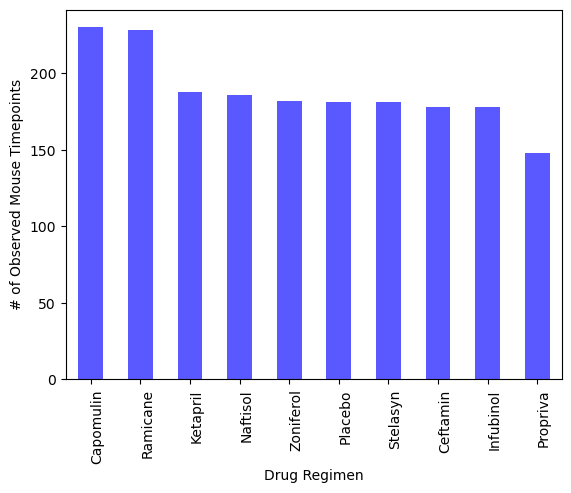

In [9]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
tum_vol_c = mouse_sum_data["Timepoint"].count().sort_values(ascending=False)

figure1 = tum_vol_c.plot(kind='bar', facecolor='blue', alpha=0.65)
figure1.set_xlabel("Drug Regimen")
figure1.set_ylabel("# of Observed Mouse Timepoints")
xtick_labels = tum_vol_c.index
figure1.set_xticklabels(xtick_labels, rotation='vertical', rotation_mode="anchor", ha="right", wrap=True)
plt.show()

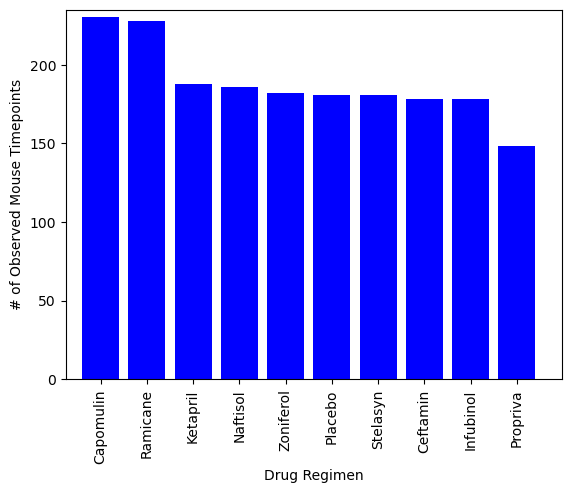

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = tum_vol_c.keys()

plt.xlabel("Drug Regimen")
plt.ylabel("# of Observed Mouse Timepoints")
plt.xlim(-0.75, len(regimens)-.025)
plt.ylim(0, max(tum_vol_c)+5)

plt.bar(regimens, tum_vol_c, facecolor='blue')
plt.xticks(rotation='vertical')
plt.show()

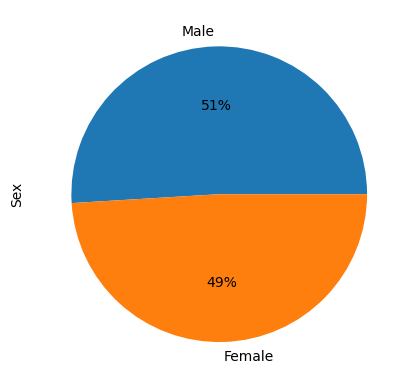

In [11]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas
mouse_gender_data = mouse_data_complete["Sex"].value_counts()
# gen_count = mouse_gender_data[["Mouse ID"]].count()
gender_piep = mouse_gender_data.plot(kind='pie', y='Mouse ID', autopct="%1.0f%%")
gender_piep.set_ylabel("Sex")
plt.show()

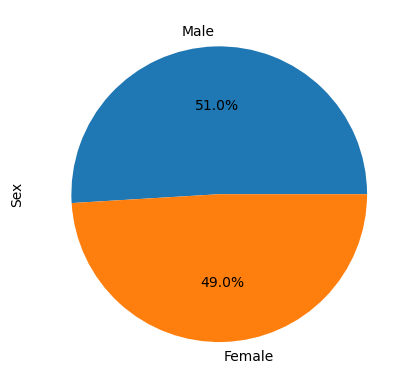

In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
labels=["Male","Female"]
plt.pie(mouse_gender_data, labels=labels, autopct="%1.1f%%")
plt.ylabel("Sex")
plt.show()

## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
filter_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]
tum_vol_data_df = mouse_data_complete[mouse_data_complete["Drug Regimen"].isin(filter_list)]

tum_df_group = tum_vol_data_df.groupby(["Mouse ID"])

tum_vol_mx = tum_df_group["Timepoint"].last()
df = pd.DataFrame({"Timepoint":tum_vol_mx})

# # Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
tum_vol_data_merge = pd.merge(df, mouse_data_complete, on=['Mouse ID','Timepoint'], how='inner')

tum_vol_data = pd.DataFrame({"Mouse ID" : tum_vol_data_merge["Mouse ID"], "Timepoint":tum_vol_data_merge["Timepoint"],"Drug Regimen":tum_vol_data_merge["Drug Regimen"], "Tumor Volume (mm3)":tum_vol_data_merge["Tumor Volume (mm3)"]})
tum_vol_data.set_index("Mouse ID")

,Timepoint,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,,
a203,45.0,Infubinol,67.973419
a251,45.0,Infubinol,65.525743
a275,45.0,Ceftamin,62.999356
a411,45.0,Ramicane,38.407618
a444,45.0,Ramicane,43.047543
...,...,...,...
y769,45.0,Ceftamin,68.594745
y793,45.0,Capomulin,31.896238
y865,45.0,Ceftamin,64.729837


In [14]:
# Put treatments into a list for for loop (and later for plot labels)
    #filter_list variable retained from previous step

# Create empty list to fill with tumor vol data (for plotting)
tvd = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
for i in filter_list:
    tvol = tum_vol_data.loc[tum_vol_data["Drug Regimen"]==i]["Tumor Volume (mm3)"]
    tvd.append(tvol)
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    quartiles = tvol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq

    # add subset 
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    # Determine outliers using upper and lower bounds
    outliers = tvol.loc[(tvol > upper_bound) | (tvol < lower_bound)]
    print(f"The outliers for {i} are {outliers}.")

The outliers for Capomulin are Series([], Name: Tumor Volume (mm3), dtype: float64).
The outliers for Ramicane are Series([], Name: Tumor Volume (mm3), dtype: float64).
The outliers for Infubinol are 15    36.321346
Name: Tumor Volume (mm3), dtype: float64.
The outliers for Ceftamin are Series([], Name: Tumor Volume (mm3), dtype: float64).


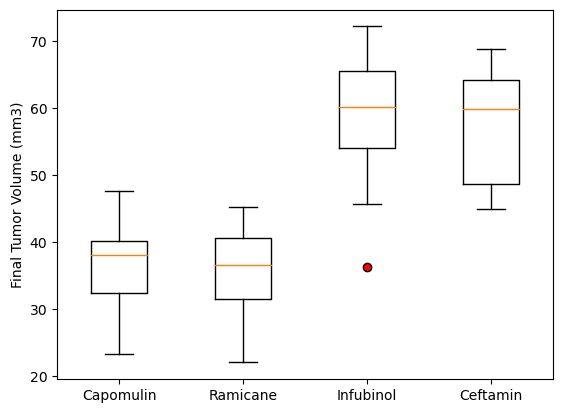

In [15]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.
plt.boxplot(tvd, labels = filter_list,flierprops = dict(marker = "o", markerfacecolor = "red"))
plt.ylabel("Final Tumor Volume (mm3)")
plt.show()
#flierprops code sourced and adapted from https://python-charts.com/distribution/box-plot-matplotlib/

## Line and Scatter Plots

Text(0, 0.5, 'Tumor Volume (mm3)')

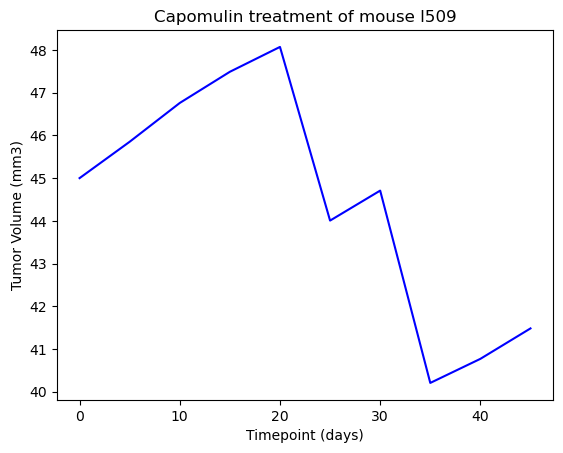

In [16]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin
Capomulin_df = mouse_data_complete[mouse_data_complete['Drug Regimen'] == "Capomulin"]
Mousel509 = Capomulin_df.loc[Capomulin_df["Mouse ID"]=="l509"]

x = Mousel509["Timepoint"]
y = Mousel509["Tumor Volume (mm3)"]

plt.plot(x, y, color="blue")
plt.title("Capomulin treatment of mouse l509")
plt.xlabel("Timepoint (days)")
plt.ylabel("Tumor Volume (mm3)")

Text(0, 0.5, 'Average Tumor Volume (mm3)')

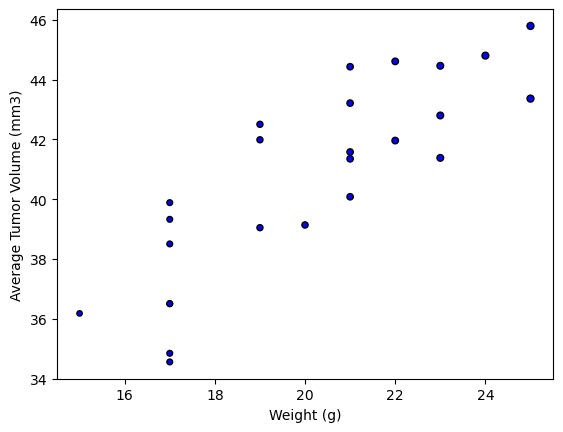

In [17]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen
mouse_data = Capomulin_df.groupby("Mouse ID")
mouse_w = mouse_data["Weight (g)"].mean()
mouse_tvol = mouse_data["Tumor Volume (mm3)"].mean()

mouse__data_df = pd.DataFrame({"Weight (g)": mouse_w, "Tumor Volume (mm3)": mouse_tvol})

x_values = mouse__data_df["Weight (g)"]
y_values = mouse__data_df["Tumor Volume (mm3)"]

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=x_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.84


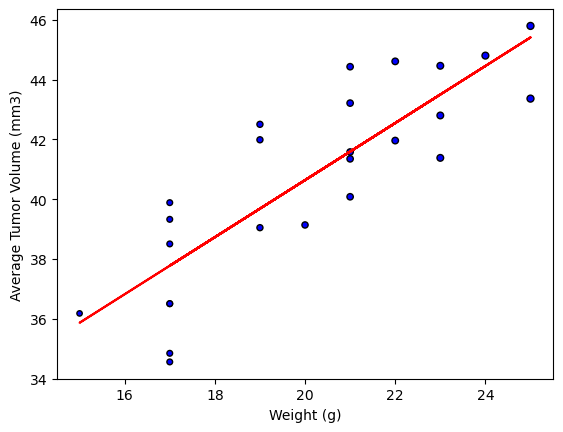

In [18]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
(slope, intercept, rvalue, pvalue, stderr) = st.linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_values, y_values, marker="o", facecolors="blue", edgecolors="black", s=x_values)
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Volume (mm3)")

plt.plot(x_values,regress_values,"r-")

print(f"The correlation between mouse weight and the average tumor volume is {round(st.pearsonr(x_values,y_values)[0],2)}")